In [13]:
import time
from src.method_selector import MlMethodSelector, ClassicMethodSelector
from src.measurement_provider import MeasurementProvider
from src.serializer import SenMLCBORSerializer, SenMLJSONSerializer
from src.signal_generator import SignalGenerator
from sys import getsizeof
from src.metric import FeatureMetricEnum, SimilarityMetricEnum
from src.data_type import Measurement
import pandas as pd
import matplotlib as plt
from src.metric import SimilarityMetricEnum
plt.rcParams["figure.dpi"] = 150

In [7]:
result = {
  "measurements_count": [],
  "SenML_CBOR": [],
  "SenML_JSON": [],
}
metrics = [1.23 for _ in range(13)]
for datasize in [i * 100 for i in range(11)]:
  if datasize == 0:
    datasize = 1
  dataset = [Measurement(100.123, 100 * i) for i in range(datasize)]
  result["SenML_CBOR"].append(getsizeof(SenMLCBORSerializer.serialize(dataset, '/72/', '1/2', metrics)))
  result["SenML_JSON"].append(getsizeof(SenMLJSONSerializer.serialize(dataset, '/72/', '1/2', metrics)))
  result["measurements_count"].append(datasize)

In [8]:
df = pd.DataFrame.from_dict(result)

0.49023427986946566


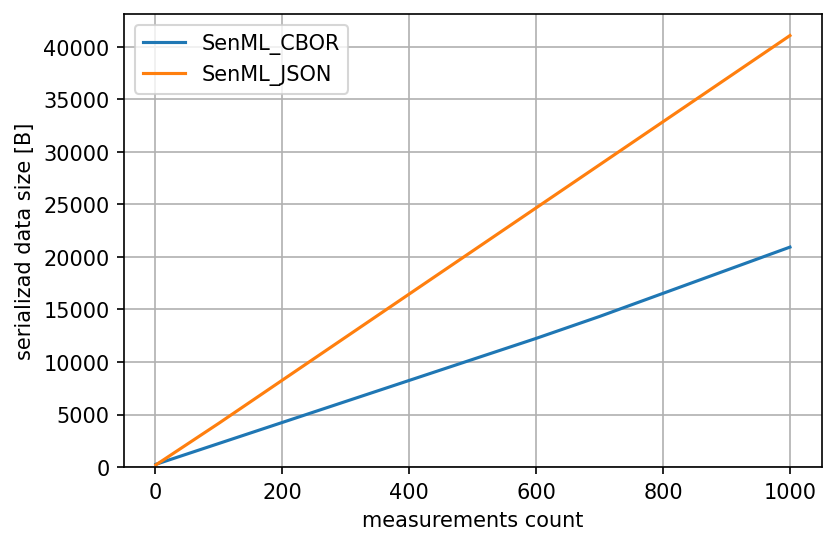

In [23]:
ax = df.plot(x='measurements_count', y=['SenML_CBOR', 'SenML_JSON'], grid=True, ylim=0)
ax.set_xlabel("measurements count")
ax.set_ylabel("serializad data size [B]")
result
print((result['SenML_JSON'][10] - result['SenML_CBOR'][10]) / result['SenML_JSON'][10])

In [24]:
for index, row in df[[
  'measurements_count',
  'SenML_CBOR',
  'SenML_JSON', 
]].iterrows():
  measurements_count = int(row[0])
  SenML_CBOR = int(row[1])
  SenML_JSON = int(row[2])
  diff = SenML_JSON - SenML_CBOR

  print(f'{measurements_count} & {SenML_CBOR} & {SenML_JSON} & {diff} \\\\')
  print('\hline')

1 & 264 & 207 & -57 \\
\hline
100 & 2243 & 4161 & 1918 \\
\hline
200 & 4243 & 8262 & 4019 \\
\hline
300 & 6244 & 12362 & 6118 \\
\hline
400 & 8244 & 16462 & 8218 \\
\hline
500 & 10244 & 20562 & 10318 \\
\hline
600 & 12244 & 24662 & 12418 \\
\hline
700 & 14332 & 28762 & 14430 \\
\hline
800 & 16532 & 32862 & 16330 \\
\hline
900 & 18732 & 36962 & 18230 \\
\hline
1000 & 20932 & 41062 & 20130 \\
\hline
